### Objective

> We know that following advice from Key personnel suggest focussing on loyal (existing) customers and the conversion of new
customers into loyal customers.

> They reveal that:

> 1. A failure to lift the average spend of loyal customers is stagnating revenue growth.

> 2. First-time customers are not converting into regular (loyal) customers.

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Collection and handling

In [2]:
import os
os.listdir('data')

['data.csv']

In [3]:
df = pd.read_csv('data/data.csv')
#Overview of the data
df.head()

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18 00:00:00,0.99,0
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18 00:00:00,0.70,0
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18 00:00:00,1.68,0
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18 00:00:00,2.59,0
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18 00:00:00,0.60,0


#### Examination of th data characteristics

###### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77750 entries, 0 to 77749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       77750 non-null  int64  
 1   product_id        77750 non-null  int64  
 2   basket_id         77750 non-null  int64  
 3   loyalty           77750 non-null  object 
 4   household_type    77750 non-null  object 
 5   age_band          77750 non-null  object 
 6   department        77750 non-null  object 
 7   brand             77750 non-null  object 
 8   commodity         77750 non-null  object 
 9   store             77750 non-null  int64  
 10  transaction_date  77750 non-null  object 
 11  price             77750 non-null  float64
 12  days_since_first  77750 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 7.7+ MB


###### Check for missing observations

In [5]:
df.isna().sum()

customer_id         0
product_id          0
basket_id           0
loyalty             0
household_type      0
age_band            0
department          0
brand               0
commodity           0
store               0
transaction_date    0
price               0
days_since_first    0
dtype: int64

#### Data Preparation

In [6]:
#Drop ID features
data = df.drop(['customer_id', 'product_id', 'basket_id'], axis = 1)

#### Examine the distribution of the customers by customer type

In [7]:
#get the number of cutomers by loyalty type
loyal = pd.DataFrame(data.loyalty.value_counts())
loyal.columns = ['Number of customers']
loyal = loyal.reset_index()
loyal.columns = ['Customer type', 'Number of customers']
loyal

,Customer type,Number of customers
0,Promiscuous,44943
1,Loyalist,31673
2,First Time Buyer,1134


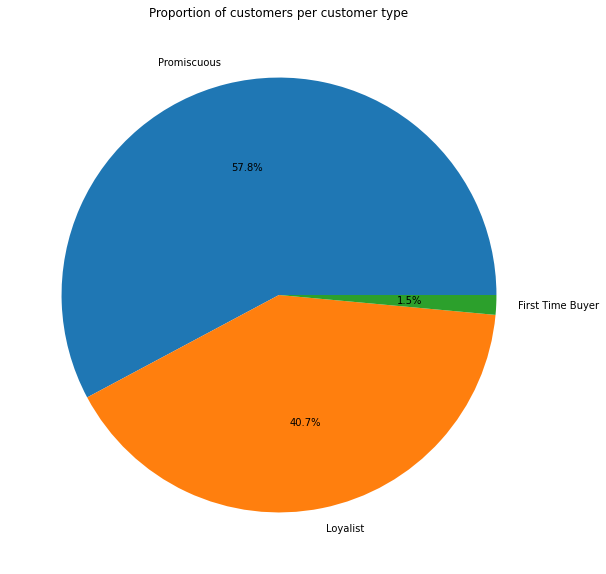

In [8]:

sec = loyal
secc = list(loyal['Customer type'])
countt = list(loyal['Number of customers'])

# Creating plot
fig = plt.figure(figsize =(12, 10))
plt.pie(countt, labels = secc,
        autopct='%1.1f%%')
plt.title('Proportion of customers per customer type')
plt.grid()
plt.show()

#### Examine the average spend of customers per customer type

In [9]:
spend = pd.DataFrame(data.groupby('loyalty')['price'].sum()).reset_index()
spend.columns = ['Customer Type', 'Total Spend']
spend

,Customer Type,Total Spend
0,First Time Buyer,3524.53
1,Loyalist,102324.80
2,Promiscuous,145365.55


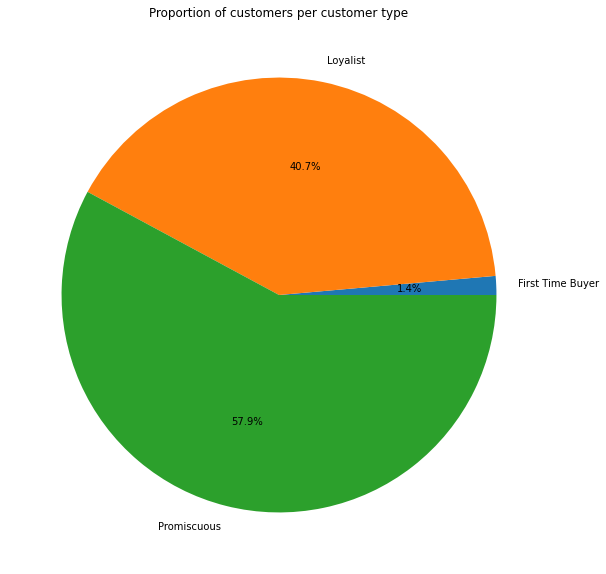

In [10]:

secc = list(spend['Customer Type'])
countt = list(spend['Total Spend'])

# Creating plot
fig = plt.figure(figsize =(12, 10))
plt.pie(countt, labels = secc,
        autopct='%1.1f%%')
plt.title('Proportion of customers per customer type')
plt.grid()
plt.show()

#### Trend of purchases over time

In [11]:
data['Date'] = pd.to_datetime(data['transaction_date'])
#Obtain overall valuyye of purchases per day

datess = pd.DataFrame(data.groupby('Date')['price'].sum()).reset_index()

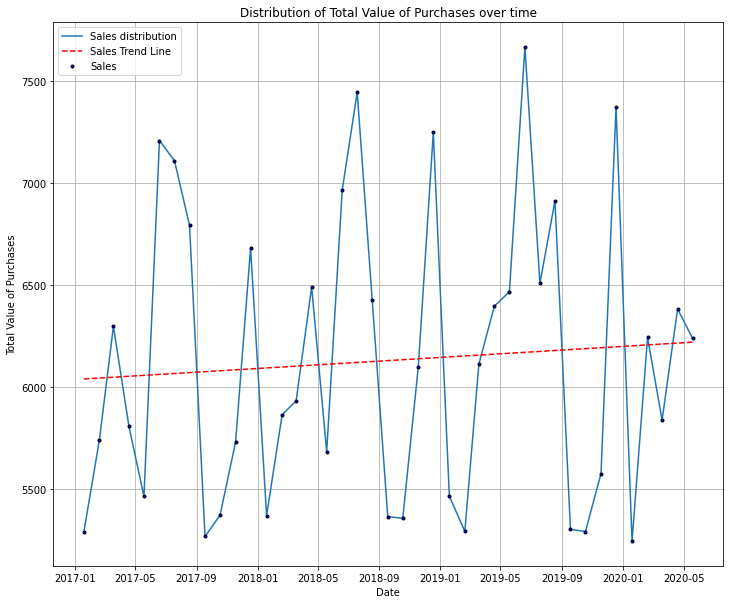

Wall time: 2.2 s


In [12]:
%%time
purchases_value = pd.DataFrame(data.groupby('Date')['price'].sum())
purchases_value.columns = ['Total Value of Purchases']
purchases_value = purchases_value.reset_index()
plt.rcParams['figure.figsize']=(12,10)
x = purchases_value['Date']
y = purchases_value['Total Value of Purchases']
import matplotlib.dates as mdates

purchases_value['Date'] = pd.to_datetime(purchases_value['Date'])
x = mdates.date2num(purchases_value['Date'])

y = purchases_value['Total Value of Purchases']

z4 = np.polyfit(x, y, 3)
p4 = np.poly1d(z4)

fig, cx = plt.subplots()

dd = mdates.num2date(x)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,y, label = 'Sales distribution')
plt.plot(x,p(x),"r--", label='Sales Trend Line')
cx.errorbar(purchases_value['Date'], y,
             marker='.',
             color='k',
             ecolor='b',
             markerfacecolor='blue',
             label="Sales",
             capsize=0,
             linestyle='')
plt.title('Distribution of Total Value of Purchases over time')
plt.ylabel('Total Value of Purchases')
plt.xlabel('Date')
cx.grid()
plt.legend(loc="upper left")
plt.show();

In [13]:
data.head()

,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,Date
0,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18 00:00:00,0.99,0,2018-10-18
1,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18 00:00:00,0.70,0,2018-10-18
2,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18 00:00:00,1.68,0,2018-10-18
3,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18 00:00:00,2.59,0,2018-10-18
4,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18 00:00:00,0.60,0,2018-10-18


#### Assumptions

> We are mainly concerned with new customers i.e., `First time buyers` and `Loyalists`. To this end, we need to understand the purchasing behaviors of these customers including their age, overall spend, households, least and most purchased items, number of days that have passed since the last purchase by an individual.

#### Data Preparation

In [14]:
#Select observations for loyalists and New buyes
dataa = data.copy()[(data['loyalty'] == 'Loyalist')| (data['loyalty'] == 'First Time Buyer')]

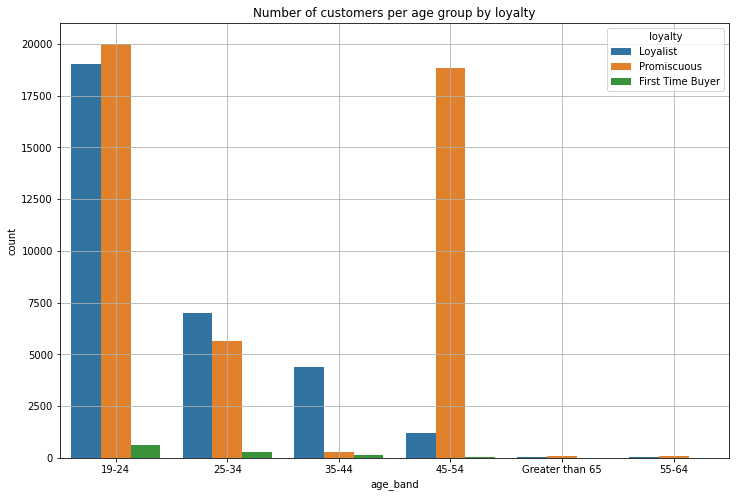

In [15]:
plt.rcParams['figure.figsize'] = 12, 8
sns.countplot(x = 'age_band', hue = 'loyalty', data = data)
plt.title('Number of customers per age group by loyalty')
plt.grid()
plt.show()

#### Determine the total spend per age group (band)

In [16]:
#AGgregate by total of overall purchases
age = pd.DataFrame(data.groupby(['age_band'])['price'].sum())
age = age.reset_index()

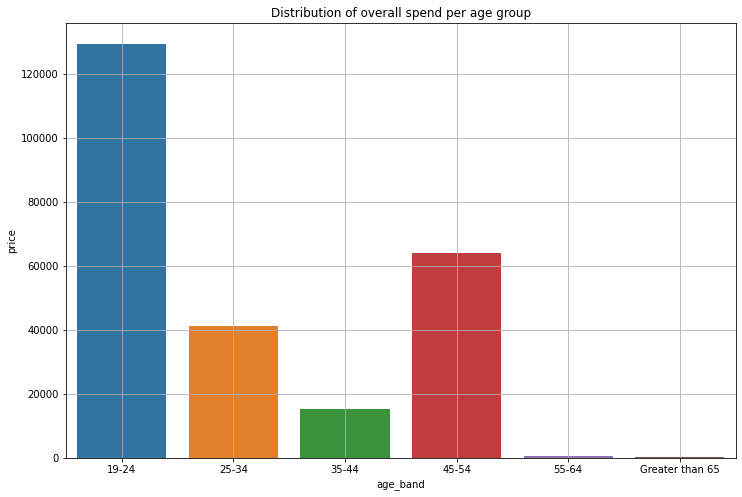

In [17]:
plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'age_band', y = 'price', data = age)
plt.title('Distribution of overall spend per age group')
plt.grid()
plt.show()

###### Household Type and Loyalty

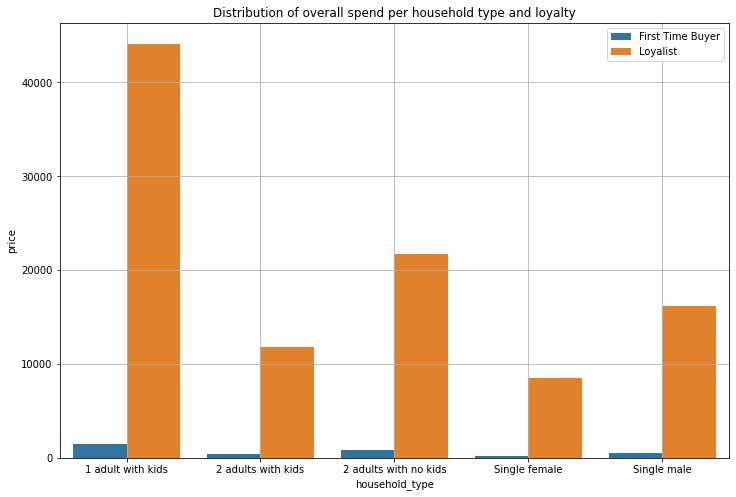

In [18]:
#AGgregate by total of overall purchases
household_loyal = pd.DataFrame(dataa.groupby(['household_type', 'loyalty'])['price'].sum())
household_loyal = household_loyal.reset_index()


plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'household_type', y = 'price', hue = 'loyalty', data = household_loyal)
plt.title('Distribution of overall spend per household type and loyalty')
plt.legend(loc = 1)
plt.grid()
plt.show()

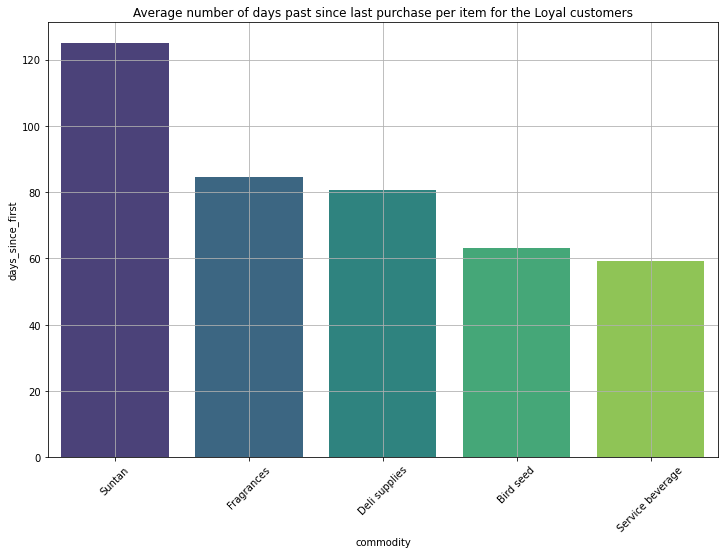

In [19]:
#AGgregate by total of overall purchases
dataax = dataa[dataa['loyalty'] == 'Loyalist']
department_loyal = pd.DataFrame(dataax.groupby(['commodity'])['days_since_first'].mean())
#Sort by days since first purchase

department_loyal = department_loyal.sort_values('days_since_first',ascending = False)

department_loyal1 = department_loyal.reset_index().head(5)

plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'commodity', y = 'days_since_first', data = department_loyal1, palette="viridis")
plt.title('Average number of days past since last purchase per item for the Loyal customers')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

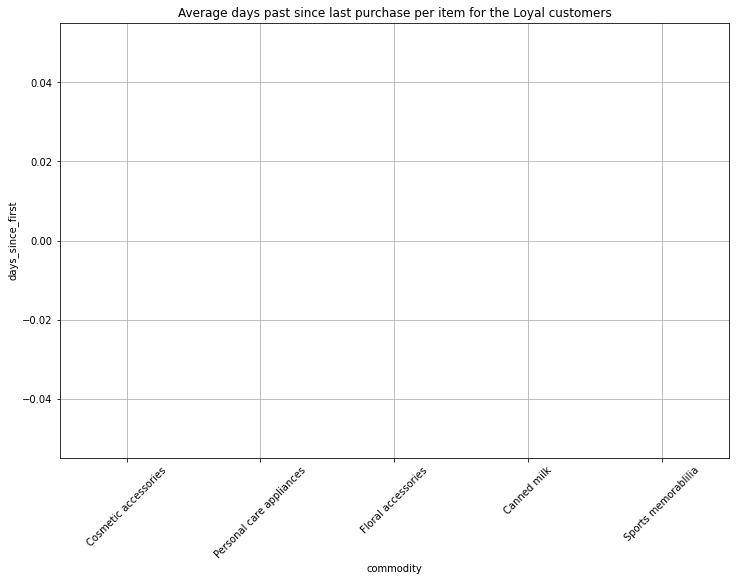

In [20]:
#AGgregate by total of overall purchases
dataax = dataa[dataa['loyalty'] == 'Loyalist']
department_loyal = pd.DataFrame(dataax.groupby(['commodity'])['days_since_first'].mean())
#Sort by days since first purchase

department_loyal = department_loyal.sort_values('days_since_first',ascending = False)

department_loyal1 = department_loyal.reset_index().tail(5)

plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'commodity', y = 'days_since_first', data = department_loyal1, palette="viridis")
plt.title('Average days past since last purchase per item for the Loyal customers')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

#### Value by commodities

In [21]:
list(department_loyal1.commodity)

['Cosmetic accessories',
 'Personal care appliances',
 'Floral accessories',
 'Canned milk',
 'Sports memorablilia']

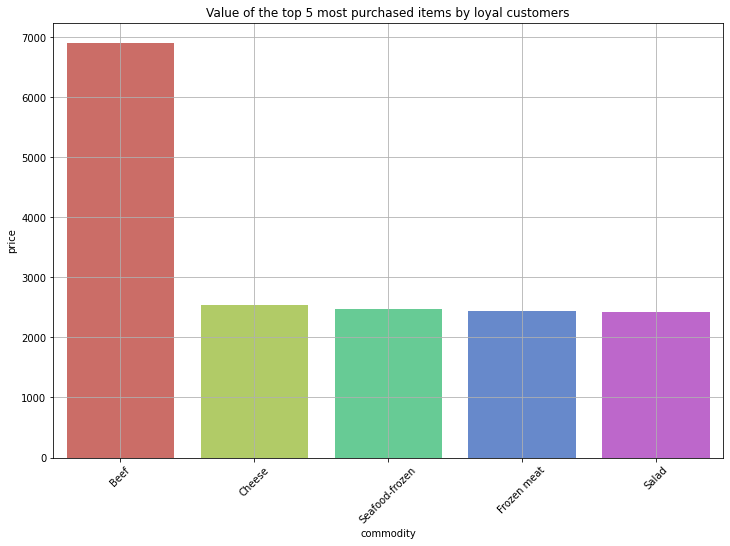

In [22]:
#AGgregate by total of overall purchases
dataax = dataa[dataa['loyalty'] == 'Loyalist']
department_loyal = pd.DataFrame(dataax.groupby(['commodity'])['price'].sum())
#Sort by days since first purchase

department_loyal = department_loyal.sort_values('price',ascending = False)

department_loyal1 = department_loyal.reset_index().head(5)


plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'commodity', y = 'price', data = department_loyal1, palette="hls")
plt.title('Value of the top 5 most purchased items by loyal customers')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

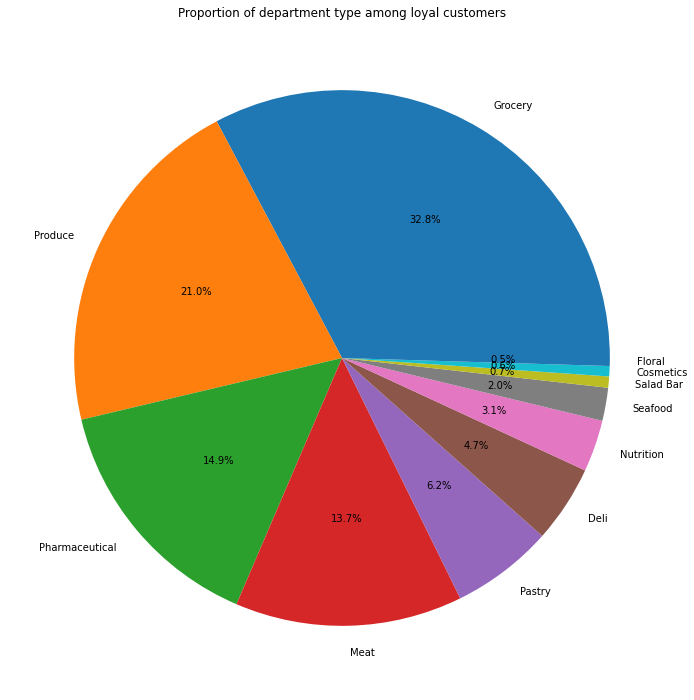

In [23]:
#get the number of cutomers by loyalty type
loyal = pd.DataFrame(dataax.department.value_counts())
loyal.columns = ['Number of customers']
loyal = loyal.reset_index()
loyal.columns = ['Customer type', 'Number of customers']


sec = loyal



secc = list(loyal['Customer type'])
countt = list(loyal['Number of customers'])

# Creating plot
fig = plt.figure(figsize =(12, 20))
plt.pie(countt, labels = secc,
        autopct='%1.1f%%')
plt.title('Proportion of department type among loyal customers')
plt.grid()
plt.show()

### Purchases by first time buyers

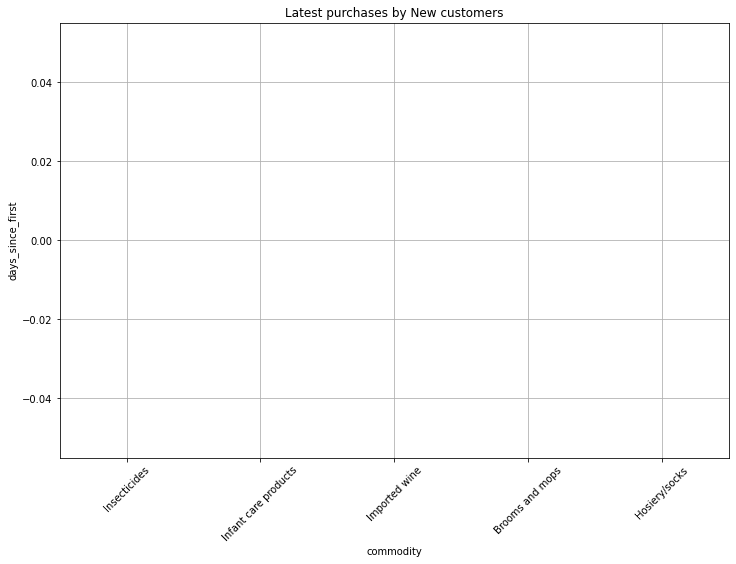

In [24]:
#AGgregate by total of overall purchases
dataax = dataa[dataa['loyalty'] == 'First Time Buyer']
department_loyal = pd.DataFrame(dataax.groupby(['commodity'])['days_since_first'].mean())
#Sort by days since first purchase

department_loyal = department_loyal.sort_values('days_since_first',ascending = False)

department_loyal1 = department_loyal.reset_index().tail(5)

plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'commodity', y = 'days_since_first', data = department_loyal1, palette="magma")
plt.title('Latest purchases by New customers')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

#### Value by commodities

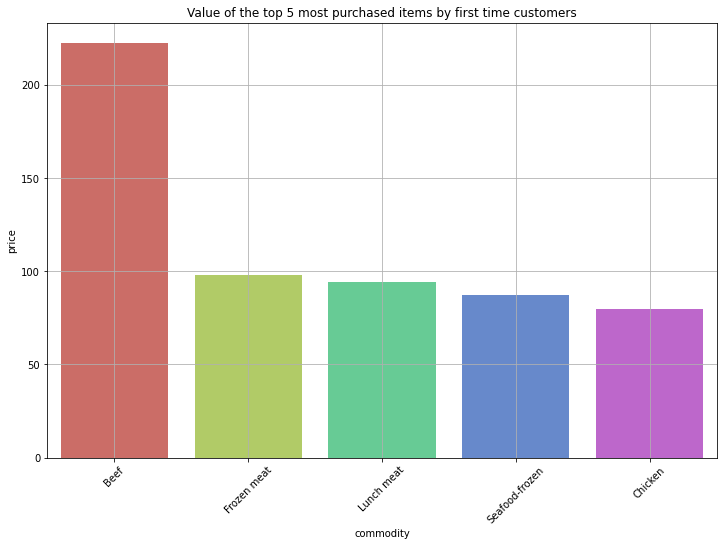

In [25]:
#AGgregate by total of overall purchases
dataax = dataa[dataa['loyalty'] == 'First Time Buyer']
department_loyal = pd.DataFrame(dataax.groupby(['commodity'])['price'].sum())
#Sort by days since first purchase

department_loyal = department_loyal.sort_values('price',ascending = False)

department_loyal1 = department_loyal.reset_index().head(5)


plt.rcParams['figure.figsize'] = 12, 8
sns.barplot(x = 'commodity', y = 'price', data = department_loyal1, palette="hls")
plt.title('Value of the top 5 most purchased items by first time customers')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

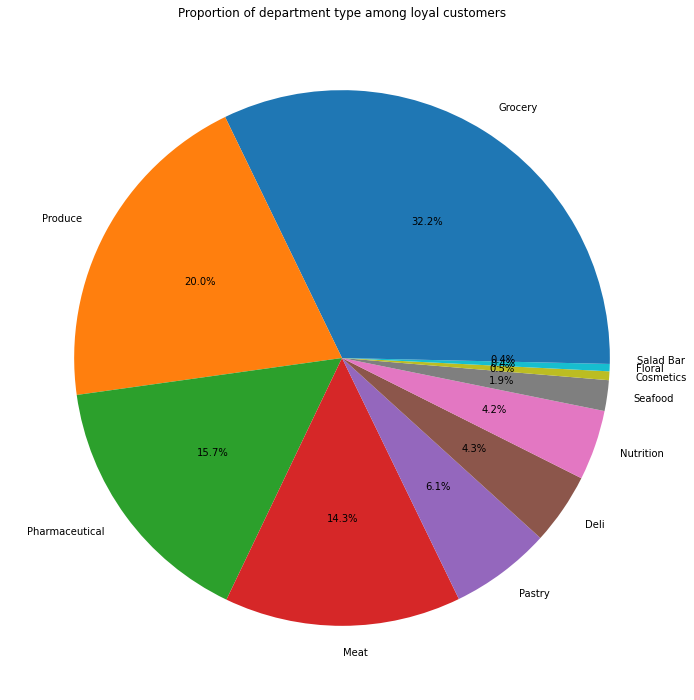

In [26]:
#get the number of cutomers by loyalty type
loyal = pd.DataFrame(dataax.department.value_counts())
loyal.columns = ['Number of customers']
loyal = loyal.reset_index()
loyal.columns = ['Customer type', 'Number of customers']


sec = loyal



secc = list(loyal['Customer type'])
countt = list(loyal['Number of customers'])

# Creating plot
fig = plt.figure(figsize =(12, 20))
plt.pie(countt, labels = secc,
        autopct='%1.1f%%')
plt.title('Proportion of department type among loyal customers')
plt.grid()
plt.show()

#### Based on our findings we have noted that


1. 40.7% and 1.5% of the customers are Loyal and First time buyers respectively.


2. There is a slight increasing trend in the total value of purchases over time.

3. Most of the customers are aged 19-24, 45-54, and 25-34 .

4. The top 5 most bought items that have a large gap in terms of the number of days since last bought by loyalists include 'Beef', 'Cheese', 'Seafood-frozen', 'Frozen meat', and 'Salad' while the latest bought items by loyalists include 'Cosmetic accessories', 'Personal care appliances', 'Floral accessories', 'Canned milk', and 'Sports memorablilia'.

5. Most valued items by new customers include beef, frozen meat lunch meat, seafood-frozen, and chicken while the latest purchased items by new customers include 'Insecticides', 'Infant care products', 'Imported wine', 'Brooms and mops', and 'Hosiery/socks'